In [1]:
%run lm_ode.ipynb

In [2]:
import matplotlib.pyplot as plt

# Model 2: Pyrolytic dehydrogenation model
Pyrolytic dehydrogenation of benzene to diphenyl and triphenyl
$$2C_2H_6\longleftrightarrow C_{12}H_{10}+H_2$$
$$C_6H_6+C_{12}H_{10}\longleftrightarrow C_{10}H_{14}+H_2$$
with differential equations model
\begin{align*}
\frac{dy_1}{dt}=&-r_1-r_2;\hspace{10mm}y_1(0)=1\\
\frac{dy_2}{dt}=&\frac{r_1}{2}-r_2;\hspace{10mm}y_2(0)=0\\
r_1=&k_1\left(y_1^2-y_2\frac{2-2y_1-y_2}{3K_1}\right)\\
r_2=&k_2\left(y_1y_2-\frac{(1-y_1-2y_2)(2-2y_1-y_2)}{9K_2}\right)
\end{align*}
with $K_1=0.242$ and $K_2=0.428$

## Scaling for parameter estimation
Let $u_1=\frac{y_1}{M_1}$ and $u_2=\frac{y_2}{M_2}$,
\begin{align*}
\frac{M_1}{t_c}\frac{du_1}{d\bar{t}}=&-k_1\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&-k_1M_1^2\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_1}{d\bar{t}}=&-k_1M_1t_c\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

\begin{align*}
\frac{M_2}{t_c}\frac{du_2}{d\bar{t}}=&\frac{k_1}{2}\left(M_1^2u_1^2-M_2u_2\frac{2-2M_1u_1-M_2u_2}{3K_1}\right)\\
&-k_2\left(M_1M_2u_1u_2-\frac{(1-M_1u_1-2M_2u_2)(2-2M_1u_1-M_2u_2)}{9K_2}\right)\\
=&\frac{k_1M_1^2}{2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1^2\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)\\
\frac{du_2}{d\bar{t}}=&\frac{k_1M_1t_c}{2}\frac{M_1}{M_2}\left(u_1^2-\frac{M_2}{M_1}u_2\frac{\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2}{3K_1}\right)\\
&-k_2M_1t_c\frac{M_1}{M_2}\left(\frac{M_2}{M_1}u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\frac{M_2}{M_1}u_2)(\frac{2}{M_1}-2u_1-\frac{M_2}{M_1}u_2)}{9K_2}\right)
\end{align*}

Let $\bar{k_1}=k_1M_1t_c$, $\bar{k_2}=k_2M_1t_c$ and $\frac{M_2}{M_1}=\gamma$,
\begin{align*}
\frac{du_1}{d\bar{t}}=&-\bar{k}_1\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\bar{k}_2\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}
\begin{align*}
\frac{du_2}{d\bar{t}}=&\frac{\bar{k}_1}{2\gamma}\left(u_1^2-\gamma u_2\frac{\frac{2}{M_1}-2u_1-\gamma u_2}{3K_1}\right)\\
&-\frac{\bar{k}_2}{\gamma}\left(\gamma u_1u_2-\frac{(\frac{1}{M_1}-u_1-2\gamma u_2)(\frac{2}{M_1}-2u_1-\gamma u_2)}{9K_2}\right)
\end{align*}

In [3]:
def model2_scaled(u,kbar,M1,M2):
    K1 = 0.242
    K2 = 0.428
    gamma = M2/M1
    r1 = u[0]**2-gamma*u[1]*(2/M1-2*u[0]-gamma*u[1])/(3*K1)
    r2 = gamma*u[0]*u[1]-(1/M1-u[0]-2*gamma*u[1])*(2/M1-2*u[0]-gamma*u[1])/(9*K2)
    dudt = np.empty(2)
    dudt[0] = -kbar[0]*r1-kbar[1]*r2
    dudt[1] = kbar[0]*r1/(2*gamma)-kbar[1]*r2/gamma
    return dudt

## Integration with estimated paramters

In [4]:
t = np.array([0,5.63,11.32,16.97,22.62,34.00,39.70,45.20,169.7],dtype='f')*1e-4
yhat = np.array([[1,0.828,0.704,0.622,0.565,0.499,0.482,0.470,0.443],
                   [0,0.0737,0.1130,0.1322,0.1400,0.1468,0.1477,0.1477,0.1476]],dtype='f')
y0 = yhat[:,0]
k = np.array([354.61,400.23])

In [5]:
tc = t[-1]
M1 = max(yhat[0,:])
M2 = max(yhat[1,:])
tbar = t/tc
uhat = np.diag([1/M1,1/M2])@yhat
u0 = uhat[:,0]
kbar = k*M1*tc

In [6]:
def model2(u,kbar):
    return model2_scaled(u,kbar,M1,M2)

In [7]:
res = integrator_jacobian(model2,u0,kbar,tbar)

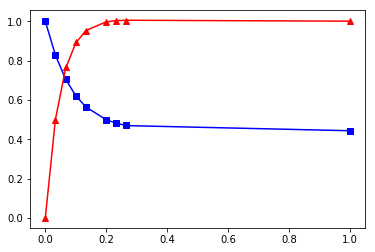

In [8]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

## Parameter estimation with LM mothod
### Test with given parameters

In [10]:
Q = np.eye(2)
k_est = gn(model2,uhat,Q,kbar,tbar,[1e-3,1e-4,1e-4,100])

Iter | Obj func | grad
    0|6.8120e-05|  1.80e-04
    1|5.4312e-05|  1.27e-06


In [11]:
k_est
print(k_est[0]/(M1*tc))

[357.17045565 407.24347291]


### Initial guess with $k=[500,500]$

In [12]:
k0 = np.array([500,500])
kbar0 = k0*M1*tc
est = gn(model2,uhat,Q,kbar0,tbar,[1e-3,1e-8,1e-8,100])

Iter | Obj func | grad
    0|3.4422e-02|  2.81e-02
    1|4.2405e-03|  1.65e-02
    2|5.5482e-05|  2.10e-04
    3|5.4312e-05|  3.04e-06
    4|5.4311e-05|  2.68e-08
    5|5.4310e-05|  6.84e-09


In [13]:
print(est[0]/(M1*tc))

[357.15386175 407.19605162]


In [14]:
est

[array([6.06090078, 6.91011671]),
 array([[1.        , 0.82722673, 0.70380499, 0.61977694, 0.56276186,
         0.4978719 , 0.48020364, 0.46863596, 0.44329833],
        [0.        , 0.50160953, 0.76086357, 0.88887096, 0.95142904,
         0.99526532, 1.00126587, 1.00343044, 1.00025575]]),
 [5, 'g']]

### Initial guess with $k=[10000,10000]$

In [48]:
k0 = np.array([-1e3,-1e3])
kbar0 = k0*M1*tc

In [49]:
y0 = [1,0]
t0 = [tbar[0],tbar[1]]

In [47]:
t0[0]

0.0

In [50]:
def dydt(t,y):
    return model2(y,kbar0)
solution = solve_ivp(dydt,[t0[0],t0[-1]],y0,method='Radau',t_eval=t0)

In [51]:
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 47
     njev: 2
      nlu: 12
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.03317619], dtype=float32)
 t_events: None
        y: array([[ 1.        ,  1.7264974 ],
       [ 0.        , -4.49476161]])

In [40]:
Y, J = integrator_jacobian(model2,y0,kbar0,t0)

In [41]:
Y

array([[ 1.        ,  1.72649719],
       [ 0.        , -4.49477262]])

In [18]:
kest = est[0]
est = gn(model2,uhat,Q,kest,tbar,[1e-1,1e-8,1e-8,100])

TypeError: 'NoneType' object is not subscriptable

In [ ]:
est

In [ ]:
kest = est[0]
res = integrator_jacobian(model2,u0,kest,tbar)

In [ ]:
plt.plot(tbar,uhat[0,:],'bs',tbar,uhat[1,:],'r^')
plt.plot(tbar,res[0][0,:],'b',tbar,res[0][1,:],'r')

In [ ]:
def Sg_ode(ode,yhat,Q,k,time):
    # check whether y is a scalar or a vector
    try:
        if np.size(yhat) == np.size(yhat,0):
            y0 = yhat[0]
            N = np.size(yhat)
        else:
            y0 = yhat[:,0]
            N = np.size(yhat,1)

        p = np.size(k)
        Y,J = integrator_jacobian(ode,y0,k,time)
        S,r = objective_func(yhat,Y,Q,N)
        return S
    except OverflowError:
        print("Problem with integration. Try with another parameters")
        return

In [ ]:
k0 = np.array([5000,5000])
kbar0 = k0*M1*tc
Y,J = integrator_jacobian(model2,u0,kbar0,tbar)

In [ ]:
S, r = objective_func(uhat,Y,Q,np.size(uhat,1))
H,g = Hg(J,Q,r,2,np.size(uhat,1))
K = np.diag(kbar0)
Hr = K@H@K
gr = K@g
hr = svdsolve(Hr,-gr)

In [ ]:
h = K@hr
print(kbar0)
print(h)

In [ ]:
nx=100
alpha = np.linspace(0,1e-3,nx)

In [ ]:
S = np.empty(nx)
for i in range(nx):
    S[i] = Sg_ode(model2,uhat,Q,kbar0+alpha[i]*h,tbar)

In [ ]:
plt.plot(alpha,S)

In [ ]:
hr = svdsolve(np.eye(2),-gr)

In [ ]:
h = K@hr
print(h)

In [ ]:
S = np.empty(20)
for i in range(20):
    S[i] = Sg_ode(model2,uhat,Q,kbar0+alpha[i]*h,tbar)

In [ ]:
plt.plot(alpha,S)